In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
pd.set_option('max_columns', 100)

### Load Data

In [3]:
train = pd.read_csv('./linguistic-features/linguistic_results_train.csv', index_col=False)
test = pd.read_csv('./linguistic-features/linguistic_results_holdout.csv', index_col=False)

In [4]:
X_train = train.drop(columns=['op','post_id','challenger','comment_id','delta_awarded'], axis=1).to_numpy().copy()
y_train = train['delta_awarded'].to_numpy().copy()
y_train[y_train == 0] = -1

In [5]:
X_test = test.drop(columns=['op','post_id','challenger','comment_id','delta_awarded'], axis=1).to_numpy().copy()
y_test = test['delta_awarded'].to_numpy().copy()
y_test[y_test == 0] = -1

In [6]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## T-test

In [9]:
cosdist = pd.read_csv('./cosdist/cosdist_output.csv', 
                      names=['op','post_id','challenger','comment_id','created_utc','delta_awarded','cosineDist'])

In [11]:
# Temporary fix
cosdist = cosdist.iloc[1:, :].reset_index(drop=True)

In [13]:
cosdist

,op,post_id,challenger,comment_id,created_utc,delta_awarded,cosineDist
0,seanyowens,2ro9ux,Nepene,cnhqcwz,1420669547.0,0,1.000000
1,seanyowens,2ro9ux,Account9726,cnhplrm,1420668292.0,1,1.000000
2,GoldenTaint,2ro0ti,TBFProgrammer,cnhowj2,1420667205.0,0,1.000000
3,GoldenTaint,2ro0ti,Bradm77,cnhuxye,1420677454.0,1,0.821826
4,rrockethr,2rnr30,Thriven,cnhlmdo,1420662125.0,0,1.000000
5,rrockethr,2rnr30,jeffertiti,cni3o83,1420693846.0,1,1.000000
6,cognitiveThizzonance,2rnfn0,arewar,cnhjtqq,1420659385.0,0,1.000000
7,cognitiveThizzonance,2rnfn0,hacksoncode,cnhn263,1420664341.0,1,1.000000
8,RazzzerBlade,2rmy6e,prezuiwf,cnhmkxc,1420663601.0,0,1.000000
9,RazzzerBlade,2rmy6e,Cavemonster,cnhc8a5,1420647118.0,1,1.000000


In [18]:
import statsmodels.api as sm
print("Statsmodel T-Test Results")
print(sm.stats.ttest_ind(
    cosdist[cosdist['delta_awarded']=='1']['cosineDist'], 
    cosdist[cosdist['delta_awarded']=='0']['cosineDist'], usevar='unequal'))

Statsmodel T-Test Results
(-0.04597633486273976, 0.9633345078293838, 1701.3060842135055)


### Descriptive Statistics

In [30]:
df.groupby(['delta_awarded']).agg({'delta_awarded':'count'})

,delta_awarded
delta_awarded,
0,2401
1,2277


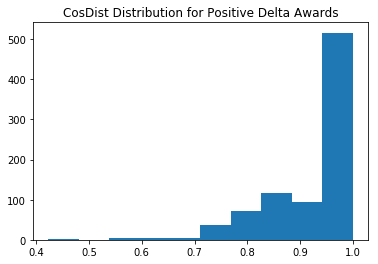

In [11]:
plt.hist(df[df['delta_result'] == 1]['cosDist'], bins=10)
plt.title('CosDist Distribution for Positive Delta Awards');

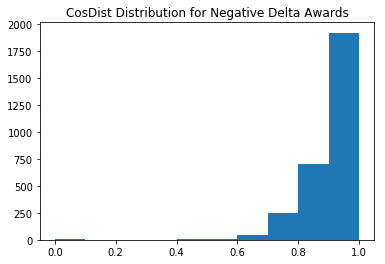

In [12]:
plt.hist(df[df['delta_result'] == 0]['cosDist'], bins=10)
plt.title('CosDist Distribution for Negative Delta Awards');

### Logistic Regression Model

Predict: Delta awarded or not

Features: linguistic features

In [26]:
from sklearn.linear_model import LogisticRegressionCV
delta_clf = LogisticRegressionCV(Cs=10, penalty='l2', fit_intercept=False, cv=5, class_weight='balanced',
                                 max_iter=1e3)
delta_clf.fit(X_train, y_train)
delta_clf.score(X_test, y_test)

0.5508072174738842

In [27]:
from sklearn.metrics import classification_report
y_pred = delta_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.54      0.69      0.61       530
           1       0.57      0.41      0.47       523

   micro avg       0.55      0.55      0.55      1053
   macro avg       0.55      0.55      0.54      1053
weighted avg       0.55      0.55      0.54      1053



In [28]:
from sklearn.metrics import roc_auc_score
y_pred = delta_clf.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.5498593022836321
